## This program is made to track the rigid body variablity across the experimental protocol

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Set the save game location
# Must have format of "../PointerExperimentData/Name_dd_mm__hh_mm_metadata" with no file extension
# saveFile = "../PointerExperimentData/Ashwin_13_02"
# saveGameLocation = saveFile + "/Ash_13_02_13_19" # must have format of "Name_dd_mm__hh_mm_metadata" with no file extension

from Experiment_pointer.runFullExperiment import saveDirectory, saveGameLocation

saveFile = saveDirectory

# Replace Experiment pointer with .. as notebook runs from another directory
saveFile = saveFile.replace("Experiment_pointer","..")
saveGameLocation = saveGameLocation.replace("Experiment_pointer","..")
path = "/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis"
os.chdir(path)
sys.path.insert(0,'/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces')

from Experiment_pointer.experimentFunctions import processTrialData
DOFOffset = 0.03
from sklearn.decomposition import PCA
from lib_streamAndRenderDataWorkflows.config_streaming import bodyParts


pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Fetch all trial information


rigidBodies1, cursorPos1,cursorVel1,goCues1,targetHits1,timeStamps1, minDof1,maxDof1,d = processTrialData(saveGameLocation + "_training1",DOFOffset)
rigidBodies2, cursorPos2,cursorVel2,goCues2,targetHits2,timeStamps2, minDof2,maxDof2,e = processTrialData(saveGameLocation + "_training2",DOFOffset)
rigidBodies3, cursorPos3,cursorVel3,goCues3,targetHits3,timeStamps3, minDof3,maxDof3,f = processTrialData(saveGameLocation + "_training3",DOFOffset)
rigidBodies4, cursorPos4,cursorVel4,goCues4,targetHits4,timeStamps4, minDof4,maxDof4,g = processTrialData(saveGameLocation + "_training4",DOFOffset)
rigidBodies5, cursorPos5,cursorVel5,goCues5,targetHits5,timeStamps5, minDof5,maxDof5,h = processTrialData(saveGameLocation + "_test",DOFOffset)# make this test 

In [3]:


def extractPCAFromRigidBodies(rigidBodyVector,cursorPos):
    """
    Function that performs pca on each rigid body in rigid body vector to extract out main variations of each rigid body during trial
    """
    dimensionalityReducedRigidBodyVector = np.zeros((rigidBodyVector.shape[0],38))
    for rigidBodyIdx in range(0,19):

        
        # Retrieve current rigid body vector
        idxStart = rigidBodyIdx * 6
        idxEnd = idxStart + 6
        currRigidBody = rigidBodyVector[:,idxStart:idxEnd]
        rigidBodyPCA = PCA(n_components=2)
        X_new = rigidBodyPCA.fit_transform(currRigidBody)
        vars = rigidBodyPCA.explained_variance_ratio_
        if len(vars) == 2:
            print("Rigid Body: {}, variance explained in PC1: {}, and in PC2: {}".format(bodyParts[rigidBodyIdx],vars[0],vars[1]))
        elif len(vars) == 3:
            print("Rigid Body: {}, variance explained in PC1: {}, and in PC2: {} , and in PC3: {}".format(bodyParts[rigidBodyIdx],vars[0],vars[1],vars[2]))
        
        dimensionalityReducedRigidBodyVector[:,rigidBodyIdx*2:rigidBodyIdx*2+2] = X_new
        
    # Find the correlation coefficients between the right hand and other rigid odies
    bodiesCorrelationCoefficients = calcCorrelationCoefficients(dimensionalityReducedRigidBodyVector)


    outputDict = {
        "pca2RigidBodies" : dimensionalityReducedRigidBodyVector,
        "rigidBodiesCorrCoeffs" : bodiesCorrelationCoefficients

    }

    return outputDict


def calcCorrelationCoefficients(dimensionalityReducedRigidBodyVector):

    """
    Calculates the correlation coefficients of the pca components
    """

    # Fetch Right hand principal component
    rightHandPrincipalComponent = dimensionalityReducedRigidBodyVector[:,findBodyPart("RHand")[0]]


    pearsonCoeffs = np.zeros(len(bodyParts))



    for idx,bodyPart in enumerate(bodyParts):
        # Fetch body part principal component
        bodyPartPrincipalComponent = dimensionalityReducedRigidBodyVector[:, findBodyPart(bodyPart)[0]]

        # Calculate correlation coefficient
        corrCoeff = np.corrcoef(rightHandPrincipalComponent,bodyPartPrincipalComponent)
        pearsonCoeffs[idx] = corrCoeff[0,1]

    return pearsonCoeffs

def findBodyPart(bodyPart):
    idx = bodyParts.index(bodyPart)
    return [idx, idx + 2]


Rigid Body: Pelvis, variance explained in PC1: 0.446394106841884, and in PC2: 0.31417209800157514
Rigid Body: Ab, variance explained in PC1: 0.40584683545797595, and in PC2: 0.26364381714594837
Rigid Body: Chest, variance explained in PC1: 0.41829566939597, and in PC2: 0.3114060092613565
Rigid Body: Neck, variance explained in PC1: 0.5141714327406914, and in PC2: 0.22471336956423543
Rigid Body: Head, variance explained in PC1: 0.4284240488030583, and in PC2: 0.3125778026487297
Rigid Body: LShoulder, variance explained in PC1: 0.5291208761909155, and in PC2: 0.22947520735244198
Rigid Body: LUArm, variance explained in PC1: 0.49483105036245645, and in PC2: 0.28817355348358187
Rigid Body: LFArm, variance explained in PC1: 0.4865643914652905, and in PC2: 0.256395380346948
Rigid Body: LHand, variance explained in PC1: 0.46845614479252357, and in PC2: 0.2516609442874927
Rigid Body: RShoulder, variance explained in PC1: 0.353575550622208, and in PC2: 0.29913050115506645
Rigid Body: RUArm, var

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_63796/4187280098.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_rigidBodyCorrelationHeatmap_trainingPhase")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_63796/4187280098.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_rigidBodyCorrelationHeatmap_trainingPhase")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_63796/4187280098.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_rigidBodyCorrelationHeatmap_trainingP

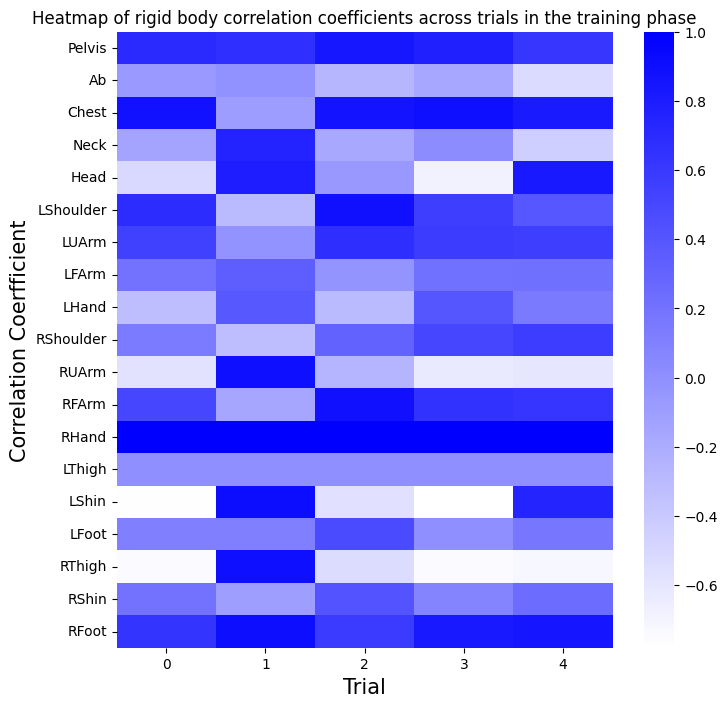

In [4]:
# Set parameters
trials = 5
rigidBodies = 19



# Pass the correct trial to the timestamp vector in seconds
timeStampVector =  timeStamps1  / 1000 #

correlationCoefficientsAcrossTrials = np.zeros((rigidBodies,trials))

# Analyse biggest PC of each rigid body trial 1 (training)
outputDictPCAVectorsTrial1 = extractPCAFromRigidBodies(rigidBodies1,cursorPos1)

# Analyse biggest PC of each rigid body trial 2 (training)
outputDictPCAVectorsTrial2 = extractPCAFromRigidBodies(rigidBodies2,cursorPos2)

# Analyse biggest PC of each rigid body trial 3 (training)
outputDictPCAVectorsTrial3 = extractPCAFromRigidBodies(rigidBodies3,cursorPos3)

# Analyse biggest PC of each rigid body trial 4 (training)
outputDictPCAVectorsTrial4 = extractPCAFromRigidBodies(rigidBodies4,cursorPos4)

# Analyse biggest PC of each rigid body trial 5 (test)
outputDictPCAVectorsTrial5 = extractPCAFromRigidBodies(rigidBodies5,cursorPos5)

# Collate all correlation coefficients to measure the evolution
correlationCoefficientsAcrossTrials[:,0] = outputDictPCAVectorsTrial1['rigidBodiesCorrCoeffs']
correlationCoefficientsAcrossTrials[:,1] = outputDictPCAVectorsTrial2['rigidBodiesCorrCoeffs']
correlationCoefficientsAcrossTrials[:,2] = outputDictPCAVectorsTrial3['rigidBodiesCorrCoeffs']
correlationCoefficientsAcrossTrials[:,3] = outputDictPCAVectorsTrial4['rigidBodiesCorrCoeffs']
correlationCoefficientsAcrossTrials[:,4] = outputDictPCAVectorsTrial5['rigidBodiesCorrCoeffs']

# # Plot rigid body correlation coefficients
# plt.plot(correlationCoefficientsAcrossTrials.transpose())
# plt.show()

# plt.imshow(correlationCoefficientsAcrossTrials, interpolation='nearest')
# plt.colorbar()  # To show the scale
# plt.show()

import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap

# Define the colors
colors = ["#ffffff","#0000ff"]  # Blue to white to red

# Create the colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors )
plt.figure(figsize=(8, 8)) 
sns.heatmap(correlationCoefficientsAcrossTrials, cmap = cmap, yticklabels = bodyParts)

plt.title("Heatmap of rigid body correlation coefficients across trials in the training phase")
plt.xlabel("Trial", fontsize = 15)
plt.ylabel("Correlation Coerfficient", fontsize = 15)
plt.savefig(saveGameLocation + "_rigidBodyCorrelationHeatmap_trainingPhase")

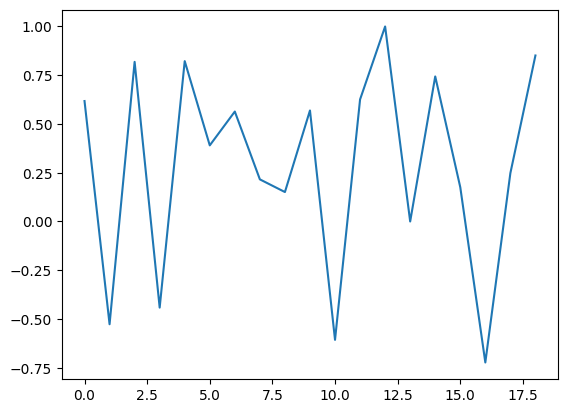